# Stage 2: Anne Nguyen


## Analysis of States

For this part, I chose to analyze New York and then compare it with California, Hawaii, Massachusetts, Virginia, and New Hampshire.

Reads in the files and drops the state rows.

In [1]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
from IPython.display import Image

cases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
deaths = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
population = pd.read_csv('../../../../data/stage_2/covid_county_population_usafacts.csv')

cases = cases.drop(cases.index[cases['countyFIPS'] == 0])
deaths = deaths.drop(deaths.index[deaths['countyFIPS'] == 0])
population = population.drop(population.index[population['countyFIPS'] == 0])

### New York

Specifies the cases and deaths in the counties of New York.

In [2]:
ny_cases = cases.loc[cases['State'] == 'NY']
ny_cases = ny_cases.drop(ny_cases.columns[:4], axis=1)
display(ny_cases.head())

ny_deaths = deaths.loc[deaths['State'] == 'NY']
ny_deaths = ny_deaths.drop(ny_deaths.columns[:4], axis=1)
display(ny_deaths.head())

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,0,0,0,0,0,0,0,0,0,0,...,25297,25410,25468,25510,25565,25607,25670,25670,25808,25847
1862,0,0,0,0,0,0,0,0,0,0,...,3592,3597,3598,3605,3611,3618,3620,3620,3622,3627
1863,0,0,0,0,0,0,0,0,0,0,...,181361,181874,182153,182378,182636,183027,183354,183354,183992,184196
1864,0,0,0,0,0,0,0,0,0,0,...,18929,18994,19020,19047,19074,19116,19180,19180,19254,19285
1865,0,0,0,0,0,0,0,0,0,0,...,5816,5834,5836,5840,5852,5863,5874,5874,5893,5897


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,0,0,0,0,0,0,0,0,0,0,...,358,358,358,358,358,358,358,358,358,358
1862,0,0,0,0,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
1863,0,0,0,0,0,0,0,0,0,0,...,6589,6589,6592,6592,6596,6596,6597,6597,6597,6599
1864,0,0,0,0,0,0,0,0,0,0,...,367,367,367,367,368,368,369,369,369,369
1865,0,0,0,0,0,0,0,0,0,0,...,93,93,93,93,93,93,94,94,94,94


Calculates the new daily cases and deaths.

In [3]:
ny_new_cases = pd.DataFrame()
for column in range(1, 573):
  ny_new_cases[column] = ny_cases.iloc[:,column] - ny_cases.iloc[:,column - 1]
display(ny_new_cases.head())

ny_new_deaths = pd.DataFrame()
for column in range(1, 573):
  ny_new_deaths[column] = ny_deaths.iloc[:,column] - ny_deaths.iloc[:,column - 1]
display(ny_new_deaths.head())

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/3915258751.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ny_new_cases[column] = ny_cases.iloc[:,column] - ny_cases.iloc[:,column - 1]


,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
1861,0,0,0,0,0,0,0,0,0,0,...,0,113,58,42,55,42,63,0,138,39
1862,0,0,0,0,0,0,0,0,0,0,...,0,5,1,7,6,7,2,0,2,5
1863,0,0,0,0,0,0,0,0,0,0,...,0,513,279,225,258,391,327,0,638,204
1864,0,0,0,0,0,0,0,0,0,0,...,0,65,26,27,27,42,64,0,74,31
1865,0,0,0,0,0,0,0,0,0,0,...,0,18,2,4,12,11,11,0,19,4


/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/3915258751.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ny_new_deaths[column] = ny_deaths.iloc[:,column] - ny_deaths.iloc[:,column - 1]


,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
1861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1863,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,4,0,1,0,0,2
1864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Groups the days into weeks.

In [4]:
ny_weekly_cases = ny_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
display(ny_weekly_cases.head())

ny_weekly_deaths = ny_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
display(ny_weekly_deaths.head())

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
1861,0,0,0,0,0,0,0,36,116,88,...,18,22,12,6,38,64,123,235,365,282
1862,0,0,0,0,0,0,0,2,0,7,...,1,5,1,0,2,8,4,9,26,16
1863,0,0,0,0,0,0,3,300,3239,5065,...,341,222,180,239,411,599,954,1466,1843,1560
1864,0,0,0,0,0,0,0,1,10,31,...,25,16,14,14,21,28,51,113,192,211
1865,0,0,0,0,0,0,0,0,0,7,...,3,3,1,5,4,25,15,39,40,45


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
1861,0,0,0,0,0,0,0,0,0,2,...,1,1,0,0,0,1,0,0,0,0
1862,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1863,0,0,0,0,0,0,0,1,59,300,...,5,-3,0,3,4,5,2,3,10,3
1864,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,1,0,0,0,1,1
1865,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


Calculates the mean of the weeks and then rounds.

In [5]:
ny_avg_weekly_cases = pd.DataFrame(ny_weekly_cases.mean(axis=0).round())
ny_avg_weekly_cases.columns = ['NY_Avg_Weekly_Cases']

ny_avg_weekly_deaths = pd.DataFrame(ny_weekly_deaths.mean(axis=0).round())
ny_avg_weekly_deaths.columns = ['NY_Avg_Weekly_Deaths']

ny_merged = ny_avg_weekly_cases.join(ny_avg_weekly_deaths)
ny_merged

,NY_Avg_Weekly_Cases,NY_Avg_Weekly_Deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,123.0,0.0
78,200.0,1.0
79,306.0,1.0
80,422.0,2.0


Calculates the overall mean, median, and mode.

In [6]:
ny_merged.mean(axis=0)

NY_Avg_Weekly_Cases     431.268293
NY_Avg_Weekly_Deaths     10.524390
dtype: float64

In [7]:
ny_merged.median(axis=0)

NY_Avg_Weekly_Cases     198.0
NY_Avg_Weekly_Deaths      3.5
dtype: float64

In [8]:
ny_merged.mode(axis=0)

,NY_Avg_Weekly_Cases,NY_Avg_Weekly_Deaths
0,0.0,1.0


Repeats the process for the rest of the states.

### California

In [9]:
ca_cases = cases.loc[cases['State'] == 'CA']
ca_cases = ca_cases.drop(ca_cases.columns[:4], axis=1)

ca_deaths = deaths.loc[deaths['State'] == 'CA']
ca_deaths = ca_deaths.drop(ca_deaths.columns[:4], axis=1)

ca_new_cases = pd.DataFrame()
for column in range(1, 573):
  ca_new_cases[column] = ca_cases.iloc[:,column] - ca_cases.iloc[:,column - 1]

ca_new_deaths = pd.DataFrame()
for column in range(1, 573):
  ca_new_deaths[column] = ca_deaths.iloc[:,column] - ca_deaths.iloc[:,column - 1]

ca_weekly_cases = ca_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
ca_weekly_deaths = ca_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

ca_avg_weekly_cases = pd.DataFrame(ca_weekly_cases.mean(axis=0).round())
ca_avg_weekly_cases.columns = ['CA_Avg_Weekly_Cases']

ca_avg_weekly_deaths = pd.DataFrame(ca_weekly_deaths.mean(axis=0).round())
ca_avg_weekly_deaths.columns = ['CA_Avg_Weekly_Deaths']

ca_merged = ca_avg_weekly_cases.join(ca_avg_weekly_deaths)
ca_merged

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/1739657819.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ca_new_cases[column] = ca_cases.iloc[:,column] - ca_cases.iloc[:,column - 1]
/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/1739657819.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ca_new_deaths[column] = ca_deaths.iloc[:,column] - ca_deaths.iloc[:,column - 1]


,CA_Avg_Weekly_Cases,CA_Avg_Weekly_Deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,558.0,3.0
78,863.0,3.0
79,1156.0,5.0
80,1381.0,-3.0


In [10]:
ca_merged.mean(axis=0)

CA_Avg_Weekly_Cases     848.036585
CA_Avg_Weekly_Deaths     13.475610
dtype: float64

In [11]:
ca_merged.median(axis=0)

CA_Avg_Weekly_Cases     391.5
CA_Avg_Weekly_Deaths      8.0
dtype: float64

In [12]:
ca_merged.mode(axis=0)

,CA_Avg_Weekly_Cases,CA_Avg_Weekly_Deaths
0,0.0,0.0


### Hawaii

In [13]:
hi_cases = cases.loc[cases['State'] == 'HI']
hi_cases = hi_cases.drop(hi_cases.columns[:4], axis=1)

hi_deaths = deaths.loc[deaths['State'] == 'HI']
hi_deaths = hi_deaths.drop(hi_deaths.columns[:4], axis=1)

hi_new_cases = pd.DataFrame()
for column in range(1, 573):
  hi_new_cases[column] = hi_cases.iloc[:,column] - hi_cases.iloc[:,column - 1]

hi_new_deaths = pd.DataFrame()
for column in range(1, 573):
  hi_new_deaths[column] = hi_deaths.iloc[:,column] - hi_deaths.iloc[:,column - 1]

hi_weekly_cases = hi_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
hi_weekly_deaths = hi_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

hi_avg_weekly_cases = pd.DataFrame(hi_weekly_cases.mean(axis=0).round())
hi_avg_weekly_cases.columns = ['HI_Avg_Weekly_Cases']

hi_avg_weekly_deaths = pd.DataFrame(hi_weekly_deaths.mean(axis=0).round())
hi_avg_weekly_deaths.columns = ['HI_Avg_Weekly_Deaths']

hi_merged = hi_avg_weekly_cases.join(hi_avg_weekly_deaths)
hi_merged

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/109017588.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  hi_new_cases[column] = hi_cases.iloc[:,column] - hi_cases.iloc[:,column - 1]
/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/109017588.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  hi_new_deaths[column] = hi_deaths.iloc[:,column] - hi_deaths.iloc[:,column - 1]


,HI_Avg_Weekly_Cases,HI_Avg_Weekly_Deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,178.0,1.0
78,265.0,2.0
79,549.0,1.0
80,757.0,2.0


In [14]:
hi_merged.mean(axis=0)

HI_Avg_Weekly_Cases     121.280488
HI_Avg_Weekly_Deaths      1.341463
dtype: float64

In [15]:
hi_merged.median(axis=0)

HI_Avg_Weekly_Cases     89.0
HI_Avg_Weekly_Deaths     1.0
dtype: float64

In [16]:
hi_merged.mode(axis=0)

,HI_Avg_Weekly_Cases,HI_Avg_Weekly_Deaths
0,0.0,0.0


### Massachusetts

In [17]:
ma_cases = cases.loc[cases['State'] == 'MA']
ma_cases = ma_cases.drop(ma_cases.columns[:4], axis=1)

ma_deaths = deaths.loc[deaths['State'] == 'MA']
ma_deaths = ma_deaths.drop(ma_deaths.columns[:4], axis=1)

ma_new_cases = pd.DataFrame()
for column in range(1, 573):
  ma_new_cases[column] = ma_cases.iloc[:,column] - ma_cases.iloc[:,column - 1]

ma_new_deaths = pd.DataFrame()
for column in range(1, 573):
  ma_new_deaths[column] = ma_deaths.iloc[:,column] - ma_deaths.iloc[:,column - 1]

ma_weekly_cases = ma_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
ma_weekly_deaths = ma_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

ma_avg_weekly_cases = pd.DataFrame(ma_weekly_cases.mean(axis=0).round())
ma_avg_weekly_cases.columns = ['MA_Avg_Weekly_Cases']

ma_avg_weekly_deaths = pd.DataFrame(ma_weekly_deaths.mean(axis=0).round())
ma_avg_weekly_deaths.columns = ['MA_Avg_Weekly_Deaths']

ma_merged = ma_avg_weekly_cases.join(ma_avg_weekly_deaths)
ma_merged

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/566939797.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ma_new_cases[column] = ma_cases.iloc[:,column] - ma_cases.iloc[:,column - 1]
/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/566939797.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ma_new_deaths[column] = ma_deaths.iloc[:,column] - ma_deaths.iloc[:,column - 1]


,MA_Avg_Weekly_Cases,MA_Avg_Weekly_Deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,147.0,2.0
78,253.0,3.0
79,392.0,1.0
80,517.0,2.0


In [18]:
ma_merged.mean(axis=0)

MA_Avg_Weekly_Cases     599.426829
MA_Avg_Weekly_Deaths     15.853659
dtype: float64

In [19]:
ma_merged.median(axis=0)

MA_Avg_Weekly_Cases     361.5
MA_Avg_Weekly_Deaths      9.0
dtype: float64

In [20]:
ma_merged.mode(axis=0)

,MA_Avg_Weekly_Cases,MA_Avg_Weekly_Deaths
0,0.0,0.0


### Virginia

In [21]:
va_cases = cases.loc[cases['State'] == 'VA']
va_cases = va_cases.drop(va_cases.columns[:4], axis=1)

va_deaths = deaths.loc[deaths['State'] == 'VA']
va_deaths = va_deaths.drop(va_deaths.columns[:4], axis=1)

va_new_cases = pd.DataFrame()
for column in range(1, 573):
  va_new_cases[column] = va_cases.iloc[:,column] - va_cases.iloc[:,column - 1]

va_new_deaths = pd.DataFrame()
for column in range(1, 573):
  va_new_deaths[column] = va_deaths.iloc[:,column] - va_deaths.iloc[:,column - 1]

va_weekly_cases = va_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
va_weekly_deaths = va_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

va_avg_weekly_cases = pd.DataFrame(va_weekly_cases.mean(axis=0).round())
va_avg_weekly_cases.columns = ['VA_Avg_Weekly_Cases']

va_avg_weekly_deaths = pd.DataFrame(va_weekly_deaths.mean(axis=0).round())
va_avg_weekly_deaths.columns = ['VA_Avg_Weekly_Deaths']

va_merged = va_avg_weekly_cases.join(va_avg_weekly_deaths)
va_merged

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/1786658714.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  va_new_cases[column] = va_cases.iloc[:,column] - va_cases.iloc[:,column - 1]
/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/1786658714.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  va_new_deaths[column] = va_deaths.iloc[:,column] - va_deaths.iloc[:,column - 1]


,VA_Avg_Weekly_Cases,VA_Avg_Weekly_Deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,25.0,0.0
78,39.0,0.0
79,67.0,0.0
80,91.0,0.0


In [22]:
va_merged.mean(axis=0)

VA_Avg_Weekly_Cases     66.353659
VA_Avg_Weekly_Deaths     1.085366
dtype: float64

In [23]:
va_merged.median(axis=0)

VA_Avg_Weekly_Cases     49.5
VA_Avg_Weekly_Deaths     1.0
dtype: float64

In [24]:
va_merged.mode(axis=0)

,VA_Avg_Weekly_Cases,VA_Avg_Weekly_Deaths
0,0.0,1.0


### New Hampshire

In [25]:
nh_cases = cases.loc[cases['State'] == 'NH']
nh_cases = nh_cases.drop(nh_cases.columns[:4], axis=1)

nh_deaths = deaths.loc[deaths['State'] == 'NH']
nh_deaths = nh_deaths.drop(nh_deaths.columns[:4], axis=1)

nh_new_cases = pd.DataFrame()
for column in range(1, 573):
  nh_new_cases[column] = nh_cases.iloc[:,column] - nh_cases.iloc[:,column - 1]

nh_new_deaths = pd.DataFrame()
for column in range(1, 573):
  nh_new_deaths[column] = nh_deaths.iloc[:,column] - nh_deaths.iloc[:,column - 1]

nh_weekly_cases = nh_new_cases.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()
nh_weekly_deaths = nh_new_deaths.groupby([[i//7 for i in range(0, 572)]], axis=1).sum()

nh_avg_weekly_cases = pd.DataFrame(nh_weekly_cases.mean(axis=0).round())
nh_avg_weekly_cases.columns = ['NH_Avg_Weekly_Cases']

nh_avg_weekly_deaths = pd.DataFrame(nh_weekly_deaths.mean(axis=0).round())
nh_avg_weekly_deaths.columns = ['NH_Avg_Weekly_Deaths']

nh_merged = nh_avg_weekly_cases.join(nh_avg_weekly_deaths)
nh_merged

/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/2065972120.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nh_new_cases[column] = nh_cases.iloc[:,column] - nh_cases.iloc[:,column - 1]
/var/folders/st/931z74n520b7_rzrgt6r9w0c0000gn/T/ipykernel_1481/2065972120.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nh_new_deaths[column] = nh_deaths.iloc[:,column] - nh_deaths.iloc[:,column - 1]


,NH_Avg_Weekly_Cases,NH_Avg_Weekly_Deaths
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,25.0,0.0
78,39.0,0.0
79,78.0,0.0
80,102.0,0.0


In [26]:
nh_merged.mean(axis=0)

NH_Avg_Weekly_Cases     125.573171
NH_Avg_Weekly_Deaths      1.670732
dtype: float64

In [27]:
nh_merged.median(axis=0)

NH_Avg_Weekly_Cases     49.0
NH_Avg_Weekly_Deaths     1.0
dtype: float64

In [28]:
nh_merged.mode(axis=0)

,NH_Avg_Weekly_Cases,NH_Avg_Weekly_Deaths
0,0.0,0.0


Normalizes the cases and deaths by a factor of 100000 for each state.

In [29]:
# New York
ny_population = population.loc[population['State'] == 'NY']
ny_total_population = ny_population['population'].sum()
ny_normalized_cases = (ny_avg_weekly_cases / ny_total_population) * 100000
ny_normalized_deaths = (ny_avg_weekly_deaths / ny_total_population) * 100000

# California
ca_population = population.loc[population['State'] == 'CA']
ca_total_population = ca_population['population'].sum()
ca_normalized_cases = (ca_avg_weekly_cases / ca_total_population) * 100000
ca_normalized_deaths = (ca_avg_weekly_deaths / ca_total_population) * 100000

# Hawaii
hi_population = population.loc[population['State'] == 'HI']
hi_total_population = hi_population['population'].sum()
hi_normalized_cases = (hi_avg_weekly_cases / hi_total_population) * 100000
hi_normalized_deaths = (hi_avg_weekly_deaths / hi_total_population) * 100000

# Massachusetts
ma_population = population.loc[population['State'] == 'MA']
ma_total_population = ma_population['population'].sum()
ma_normalized_cases = (ma_avg_weekly_cases / ma_total_population) * 100000
ma_normalized_deaths = (ma_avg_weekly_deaths / ma_total_population) * 100000

# Virginia
va_population = population.loc[population['State'] == 'VA']
va_total_population = va_population['population'].sum()
va_normalized_cases = (va_avg_weekly_cases / va_total_population) * 100000
va_normalized_deaths = (va_avg_weekly_deaths / va_total_population) * 100000

# New Hampshire
nh_population = population.loc[population['State'] == 'NH']
nh_total_population = nh_population['population'].sum()
nh_normalized_cases = (nh_avg_weekly_cases / nh_total_population) * 100000
nh_normalized_deaths = (nh_avg_weekly_deaths / nh_total_population) * 100000

Combines all normalized cases and combines all normalized deaths.

In [30]:
normalized_cases = pd.concat([ny_normalized_cases, ca_normalized_cases, 
                              hi_normalized_cases, ma_normalized_cases, 
                              va_normalized_cases, nh_normalized_cases], axis=1)
normalized_cases.columns = ['New York', 'California', 'Hawaii', 
                            'Massachusetts', 'Virginia', 'New Hampshire']

normalized_deaths = pd.concat([ny_normalized_deaths, ca_normalized_deaths, 
                               hi_normalized_deaths, ma_normalized_deaths, 
                               va_normalized_deaths, nh_normalized_deaths], axis=1)
normalized_deaths.columns = ['New York', 'California', 'Hawaii', 
                             'Massachusetts', 'Virginia', 'New Hampshire']

Converting normalized data to csv files for stage 3.

In [31]:
normalized_cases.to_csv("normalized_cases.csv")
normalized_deaths.to_csv("normalized_deaths.csv")

Plots the normalized cases of the states as a line graph.

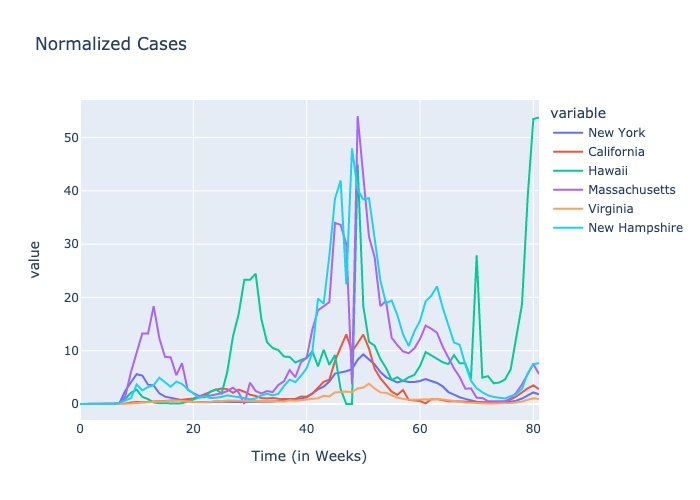

In [32]:
normalized_cases.index.names = ['Time (in Weeks)']
fig = normalized_cases.plot(kind='line', title='Normalized Cases')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Plots the normalized deaths of the states as a line graph.

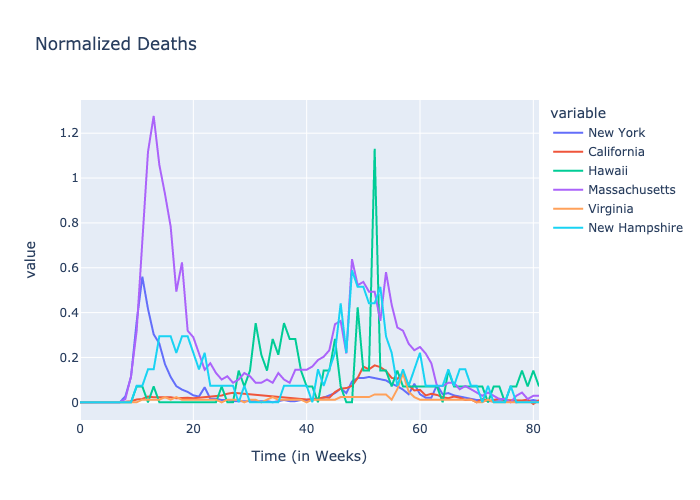

In [33]:
normalized_deaths.index.names = ['Time (in Weeks)']
fig = normalized_deaths.plot(kind='line', title='Normalized Deaths')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Questions

Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

The rates may differ across states because of population density or differing vaccination rates. States with more people in a certain area may have higher rates of cases and deaths. Likewise, states with a lower percentage of the population vaccinated may have higher rates of cases and deaths. The main peak was near the end of 2020. This could have been due to traveling and gatherings for end of the year holidays (Thanksgiving, Christmas, etc.). For the most part, the states patterns match up with the US pattern with the exception of Massachusetts in the normalized deaths graph.

## Analysis of Counties

In this part, I also chose to analyze New York

In [34]:
display(cases.loc[cases['State'] == 'NY'])
display(deaths.loc[deaths['State'] == 'NY'])
display(ny_population)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,36001,Albany County,NY,36,0,0,0,0,0,0,...,25297,25410,25468,25510,25565,25607,25670,25670,25808,25847
1862,36003,Allegany County,NY,36,0,0,0,0,0,0,...,3592,3597,3598,3605,3611,3618,3620,3620,3622,3627
1863,36005,Bronx County,NY,36,0,0,0,0,0,0,...,181361,181874,182153,182378,182636,183027,183354,183354,183992,184196
1864,36007,Broome County,NY,36,0,0,0,0,0,0,...,18929,18994,19020,19047,19074,19116,19180,19180,19254,19285
1865,36009,Cattaraugus County,NY,36,0,0,0,0,0,0,...,5816,5834,5836,5840,5852,5863,5874,5874,5893,5897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,36115,Washington County,NY,36,0,0,0,0,0,0,...,3243,3262,3266,3274,3279,3289,3296,3296,3312,3317
1919,36117,Wayne County,NY,36,0,0,0,0,0,0,...,5909,5932,5944,5952,5965,5976,5997,5997,6023,6042
1920,36119,Westchester County,NY,36,0,0,0,0,0,0,...,132327,132653,132821,132982,133197,133425,133627,133627,134021,134167
1921,36121,Wyoming County,NY,36,0,0,0,0,0,0,...,3633,3637,3638,3639,3641,3644,3648,3648,3651,3652


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,36001,Albany County,NY,36,0,0,0,0,0,0,...,358,358,358,358,358,358,358,358,358,358
1862,36003,Allegany County,NY,36,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
1863,36005,Bronx County,NY,36,0,0,0,0,0,0,...,6589,6589,6592,6592,6596,6596,6597,6597,6597,6599
1864,36007,Broome County,NY,36,0,0,0,0,0,0,...,367,367,367,367,368,368,369,369,369,369
1865,36009,Cattaraugus County,NY,36,0,0,0,0,0,0,...,93,93,93,93,93,93,94,94,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,36115,Washington County,NY,36,0,0,0,0,0,0,...,55,55,56,56,56,56,56,56,56,56
1919,36117,Wayne County,NY,36,0,0,0,0,0,0,...,73,73,73,73,73,73,73,73,73,73
1920,36119,Westchester County,NY,36,0,0,0,0,0,0,...,2297,2297,2298,2298,2298,2298,2300,2300,2300,2301
1921,36121,Wyoming County,NY,36,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53


,countyFIPS,County Name,State,population
1863,36001,Albany County,NY,305506
1864,36003,Allegany County,NY,46091
1865,36005,Bronx County,NY,1418207
1866,36007,Broome County,NY,190488
1867,36009,Cattaraugus County,NY,76117
...,...,...,...,...
1920,36115,Washington County,NY,61204
1921,36117,Wayne County,NY,89918
1922,36119,Westchester County,NY,967506
1923,36121,Wyoming County,NY,39859


Increments the index of ny_weekly_cases by 2 to match the index of ny_population. Then, normalizes the cases and deaths by a factor of 10000.

In [35]:
ny_weekly_cases.index += 2
ny_normalized_county_cases = ny_weekly_cases.divide(ny_population['population'], axis=0) * 10000

ny_weekly_deaths.index += 2
ny_normalized_county_deaths = ny_weekly_cases.divide(ny_population['population'], axis=0) * 10000

Finds the top five counties with the highest case rates.

In [36]:
ny_normalized_county_cases.mean(axis=1).sort_values(ascending=False).head()

1905    20.325161
1906    18.111753
1914    17.311677
1892    17.309685
1922    16.911347
dtype: float64

Finds the top five counties with highest death rates.

In [37]:
ny_normalized_county_deaths.mean(axis=1).sort_values(ascending=False).head()

1905    20.325161
1906    18.111753
1914    17.311677
1892    17.309685
1922    16.911347
dtype: float64

Prints the names of the top five counties.

In [38]:
print(ny_population.loc[1905, 'County Name'])
print(ny_population.loc[1906, 'County Name'])
print(ny_population.loc[1914, 'County Name'])
print(ny_population.loc[1892, 'County Name'])
print(ny_population.loc[1922, 'County Name'])

Richmond County
Rockland County
Suffolk County
Nassau County
Westchester County


Combines the cases of the top five counties and combines the deaths.

In [39]:
top_five_cases = pd.concat([ny_weekly_cases.loc[[1905]], 
                            ny_weekly_cases.loc[[1906]], 
                            ny_weekly_cases.loc[[1914]], 
                            ny_weekly_cases.loc[[1892]],
                            ny_weekly_cases.loc[[1922]]])
top_five_cases.index = ['Richmond County', 'Rockland County', 'Suffolk County', 
                        'Nassau County', 'Westchester County']
display(top_five_cases)

top_five_deaths = pd.concat([ny_weekly_deaths.loc[[1905]], 
                             ny_weekly_deaths.loc[[1906]], 
                             ny_weekly_deaths.loc[[1914]], 
                             ny_weekly_deaths.loc[[1892]],
                             ny_weekly_deaths.loc[[1922]]])
top_five_deaths.index = ['Richmond County', 'Rockland County', 'Suffolk County', 
                         'Nassau County', 'Westchester County']
display(top_five_deaths)

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Richmond County,0,0,0,0,0,0,4,73,1089,1386,...,141,155,198,216,280,412,624,889,1219,852
Rockland County,0,0,0,0,0,0,6,24,938,2353,...,33,38,36,83,74,79,151,239,453,284
Suffolk County,0,0,0,0,0,0,6,110,2144,5345,...,246,191,170,202,331,621,1049,1746,2305,1927
Nassau County,0,0,0,0,0,0,28,155,3102,6269,...,205,152,155,239,433,721,1183,1773,2345,1927
Westchester County,0,0,0,0,0,10,111,417,4153,5992,...,128,77,109,96,221,345,522,946,1201,970


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Richmond County,0,0,0,0,0,0,0,0,21,52,...,2,3,0,2,1,3,2,3,5,5
Rockland County,0,0,0,0,0,0,0,2,5,22,...,0,1,1,2,0,0,0,0,2,0
Suffolk County,0,0,0,0,0,0,0,3,17,49,...,2,1,2,4,0,2,3,2,5,7
Nassau County,0,0,0,0,0,0,0,1,16,59,...,2,3,1,1,2,1,1,2,6,4
Westchester County,0,0,0,0,0,0,0,0,8,56,...,5,1,1,0,0,2,1,1,1,3


Calculates the log normalized cases and deaths.

In [40]:
top_five_log_cases = np.log10(top_five_cases).replace([np.inf, -np.inf], 0)
display(top_five_log_cases)

top_five_log_deaths = np.log10(top_five_deaths).replace([np.inf, -np.inf], 0)
display(top_five_log_deaths)

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Richmond County,0.0,0.0,0.0,0.0,0.0,0.0,0.602060,1.863323,3.037028,3.141763,...,2.149219,2.190332,2.296665,2.334454,2.447158,2.614897,2.795185,2.948902,3.086004,2.930440
Rockland County,0.0,0.0,0.0,0.0,0.0,0.0,0.778151,1.380211,2.972203,3.371622,...,1.518514,1.579784,1.556303,1.919078,1.869232,1.897627,2.178977,2.378398,2.656098,2.453318
Suffolk County,0.0,0.0,0.0,0.0,0.0,0.0,0.778151,2.041393,3.331225,3.727948,...,2.390935,2.281033,2.230449,2.305351,2.519828,2.793092,3.020775,3.242044,3.362671,3.284882
Nassau County,0.0,0.0,0.0,0.0,0.0,0.0,1.447158,2.190332,3.491642,3.797198,...,2.311754,2.181844,2.190332,2.378398,2.636488,2.857935,3.072985,3.248709,3.370143,3.284882
Westchester County,0.0,0.0,0.0,0.0,0.0,1.0,2.045323,2.620136,3.618362,3.777572,...,2.107210,1.886491,2.037426,1.982271,2.344392,2.537819,2.717671,2.975891,3.079543,2.986772


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
Richmond County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.322219,1.716003,...,0.30103,0.477121,0.00000,0.30103,0.00000,0.477121,0.301030,0.477121,0.698970,0.698970
Rockland County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301030,0.698970,1.342423,...,0.00000,0.000000,0.00000,0.30103,0.00000,0.000000,0.000000,0.000000,0.301030,0.000000
Suffolk County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,1.230449,1.690196,...,0.30103,0.000000,0.30103,0.60206,0.00000,0.301030,0.477121,0.301030,0.698970,0.845098
Nassau County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.204120,1.770852,...,0.30103,0.477121,0.00000,0.00000,0.30103,0.000000,0.000000,0.301030,0.778151,0.602060
Westchester County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.903090,1.748188,...,0.69897,0.000000,0.00000,0.00000,0.00000,0.301030,0.000000,0.000000,0.000000,0.477121


Plots the raw data of the top five counties in New York.

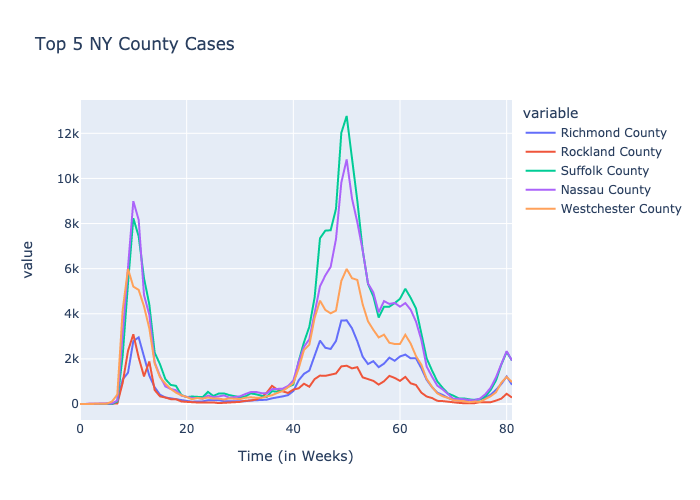

In [41]:
top_five_cases = top_five_cases.T
top_five_cases.index.names = ['Time (in Weeks)']
fig = top_five_cases.plot(kind='line', title='Top 5 NY County Cases')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Plots the log normalized cases of the top five counties in New York.

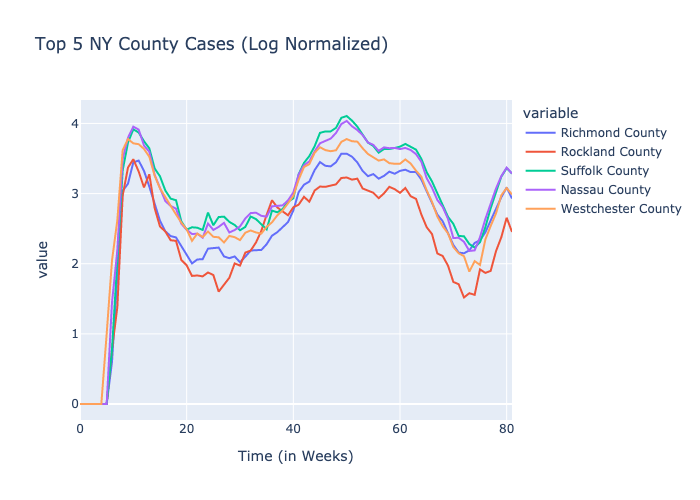

In [42]:
top_five_log_cases = top_five_log_cases.T
top_five_log_cases.index.names = ['Time (in Weeks)']
fig = top_five_log_cases.plot(kind='line', 
                              title='Top 5 NY County Cases (Log Normalized)')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Plots the raw data of the top five counties in New York.

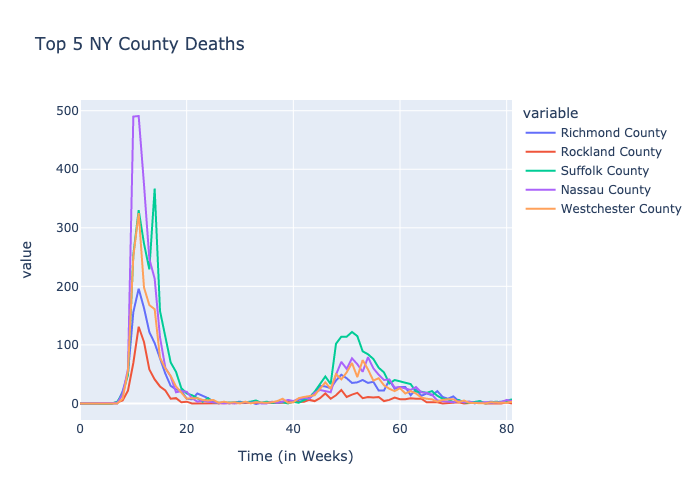

In [43]:
top_five_deaths = top_five_deaths.T
top_five_deaths.index.names = ['Time (in Weeks)']
fig = top_five_deaths.plot(kind='line', title='Top 5 NY County Deaths')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Plots the log normalized deaths of the top five counties in New York.

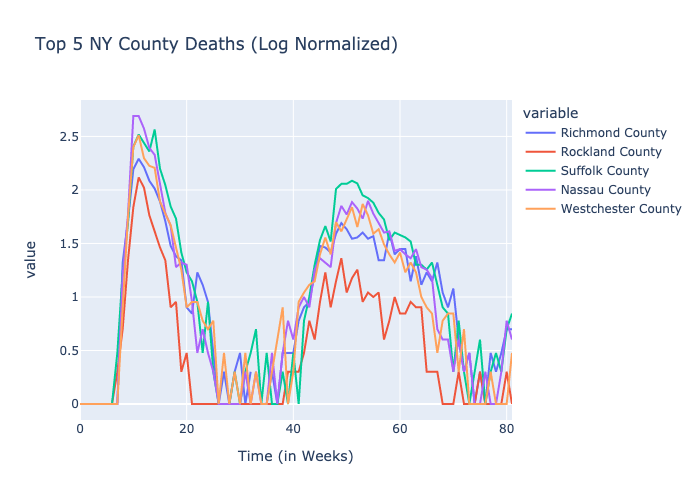

In [44]:
top_five_log_deaths = top_five_log_deaths.T
top_five_log_deaths.index.names = ['Time (in Weeks)']
fig = top_five_log_deaths.plot(kind='line', 
                               title='Top 5 NY County Deaths (Log Normalized)')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

### Questions

Describe what is causing them and what were the peaks. Do the counties follow state pattern?

In both cases and deaths, there were two main peaks. The first peak occurred around April 2020 and the second peak occurred around the end of 2020. The first peak is most likely due to the start of the pandemic. This is about the time when schools and businesses were either closing or switching to virtual. Similiar to the US pattern, the second peak was most likely due to end of the year holidays. For the most part, the counties follow the state pattern since New York also had peaks around April 2020 and the end of 2020.